# Simple Linear Regression

\begin{equation}
y = \beta_{0} + \beta_{1}x
\end{equation}

\begin{equation}
\beta_{1} = \frac{\overline{x * y} - \overline{x} * \overline{y}}{\overline{x^2} - (\overline{x})^2}
\end{equation}

\begin{equation}
\beta_0 = \overline{y} - \beta_1\overline{x}
\end{equation}

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

df = pd.read_csv('../datasets/econometrics1.csv')
df.head()

,income,spendings
0,18573,14654
1,28796,24925
2,8814,6896
3,22943,18034
4,24407,19073


In [24]:
# compute parameter beta 1
def get_beta_1(x, y):
    x = np.array(x)
    y = np.array(y)
    return ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - x.mean() ** 2)

# compute parameter beta 0
# return both b0 and b1
def get_beta(x, y):
    b1 = get_beta_1(x, y)
    return y.mean() - b1 * x.mean(), b1

# compute linear regression for a single x
def _linear_regression(x, b0, b1):
    return b0 + b1 * x

# compute linear regression for multiple observations
def linear_regression(x, b0, b1):
    return np.array([_linear_regression(xi, b0, b1) for xi in x])

In [25]:
x = df['income'].values
y = df['spendings'].values

b0, b1 = get_beta(x, y)
print(f'b0: {b0}')
print(f'b1: {b1}')

b0: -635.5132030025561
b1: 0.7268212298237102


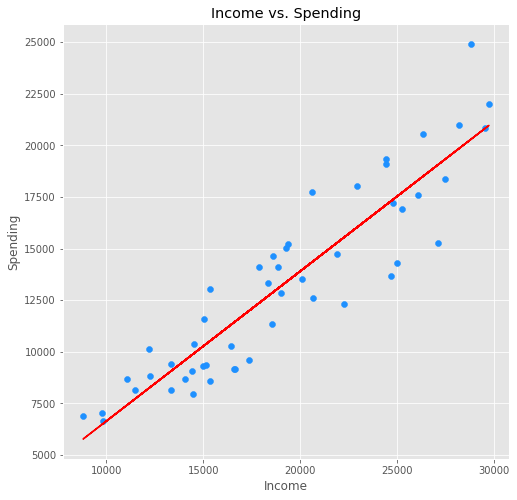

In [29]:
y_pred = linear_regression(x, b0, b1)

plt.figure(figsize=(8,8))
plt.scatter(x, y, color='dodgerblue')
plt.plot(x, y_pred, color='red')
plt.title('Income vs. Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

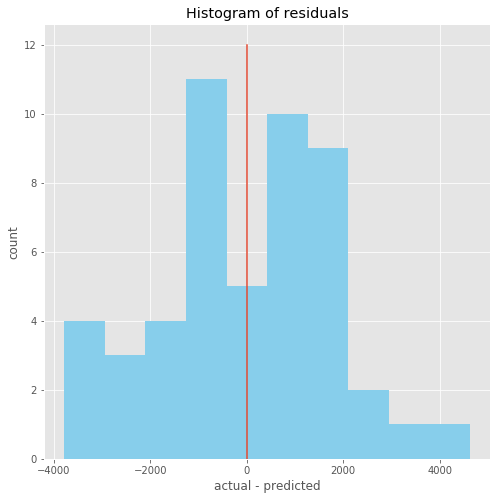

In [33]:
# histogram of residuals

residuals = y - y_pred

plt.figure(figsize=(8, 8))
plt.hist(residuals, color='skyblue')
plt.plot([0, 0], [0, 12])
plt.title('Histogram of residuals')
plt.xlabel('actual - predicted')
plt.ylabel('count')
plt.show()